# Prediction
In this notebook we will preprocess the data and feed them to the Machine Learning models.

## Importing the Dataset

In [20]:
import sys
import os
import warnings

# Add the directory containing utils.py to the Python path
sys.path.append(os.path.abspath(os.path.join('..', '..')))

# Ignore warnings
warnings.filterwarnings('ignore')

In [21]:
from utils import load_dataset

DATA_PATH = '../data/apple_quality.csv'
apple_data = load_dataset(DATA_PATH)
apple_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


## Data Cleaning


In the process of data cleaning we will handle the missing values and convert the categorical variables to numerical variables.

In [22]:
# Check for missing values
missing_values = apple_data.isnull().sum()
missing_values

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

There is only one missing value for each column. Given that we have 4000 records at our disposal, we can simply drop the rows containing missing values.

In [23]:
apple_data = apple_data.dropna()
apple_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [24]:
# Check for missing values
missing_values = apple_data.isnull().sum()
missing_values

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

As we can now see, there are no more missing values in the dataset. Now we will proceed with transforming the categorical column `Quality` into numerical values. We will use a `LabelEncoder` that transforms the values into 0 and 1. This is ok for an attribute with only two values. For attributes with more than two values, we would use a `OneHotEncoder`.

In [25]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
apple_quality = apple_data['Quality']
apple_quality_encoded = encoder.fit_transform(apple_quality)
apple_quality_encoded

array([1, 1, 0, ..., 0, 1, 1])

In [26]:
apple_data['QualityEncoded'] = apple_quality_encoded
apple_data.drop('Quality', axis=1, inplace=True)
apple_data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,QualityEncoded
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1


## Train-Test Split

In this paragraph we will divide the dataset in train set and test set using the 0.3 split ratio.

In [27]:
X = apple_data.drop(columns=['QualityEncoded'])
X.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036


In [28]:
y = apple_data['QualityEncoded']
y

0       1
1       1
2       0
3       1
4       1
       ..
3995    0
3996    1
3997    0
3998    1
3999    1
Name: QualityEncoded, Length: 4000, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check the shapes of the resulting datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2800, 8)
X_test shape: (1200, 8)
y_train shape: (2800,)
y_test shape: (1200,)


In [30]:
X_train.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
3215,3215.0,1.575850,-3.005398,-1.126534,-0.195180,3.094803,-0.377438,1.704576907
3126,3126.0,2.682281,0.897649,-1.023634,2.244069,-0.301777,-2.576000,0.629952465
697,697.0,-1.104934,-0.043345,0.856840,-0.079905,2.593540,-0.586165,-3.786816268
3613,3613.0,-1.389891,0.861630,-2.185817,1.053755,-0.172354,1.455256,-0.87745592
2374,2374.0,0.500270,-1.842282,1.410977,-0.508555,-1.019181,-1.021734,1.458007057


In [31]:
y_train.head()

3215    1
3126    0
697     1
3613    1
2374    1
Name: QualityEncoded, dtype: int64

## Modeling

In this section we will train and test the models.

In [32]:
from tqdm import tqdm
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

def train_models(models, param_grids, cv=3):
    # Assume X_train, X_test, y_train, y_test are loaded
    results = []

    for model_name in tqdm(models, desc="Training models"):
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', models[model_name])
        ])
        grid_search = GridSearchCV(pipeline, param_grids[model_name], cv=cv, scoring='accuracy', verbose=1)
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        test_score = best_model.score(X_test, y_test)
        results.append({
            'Model': model_name,
            'Best Params': grid_search.best_params_,
            'Cross-Validation Score': grid_search.best_score_,
            'Test Accuracy': test_score
        })
        
        # Transform in a dataframe
        results_df = pd.DataFrame(results)

    return results_df

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'GradientBoosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(),
    'SVM': SVC(),
    'KNeighbors': KNeighborsClassifier(),
    'NaiveBayes': GaussianNB(),
    'LightGBM': LGBMClassifier(verbose=-1),
    'CatBoost': CatBoostClassifier(verbose=0),
    'BaggingClassifier': BaggingClassifier(),
        'VotingClassifier': VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('gb', GradientBoostingClassifier()),
            ('xgb', XGBClassifier())
        ]
    ),
}

param_grids = {
    # Parameters for LogisticRegression
    'LogisticRegression': {
        'model__C': [0.01, 0.1, 1.0],
        'model__solver': ['liblinear', 'lbfgs'],
    },
    # Parameters for DecisionTree
    'DecisionTree': {
        'model__max_depth': [10, 20, None],
        'model__min_samples_split': [2, 5],
    },
    # Parameters for RandomForest
    'RandomForest': {
        'model__n_estimators': [100, 200],
        'model__max_depth': [10, 20],
    },
    # Parameters for GradientBoosting
    'GradientBoosting': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
    },
    # Parameters for XGBoost
    'XGBoost': {
        'model__n_estimators': [100, 200],
        'model__learning_rate': [0.01, 0.1],
    },
    'SVM': {
        'model__C': [0.1, 1],
        'model__kernel': ['linear', 'rbf'],
    },
    'KNeighbors': {
        'model__n_neighbors': [3, 5],
        'model__weights': ['uniform', 'distance'],
    },
    'NaiveBayes': {},
        'LightGBM': {
        'model__n_estimators': [50, 100],
        'model__learning_rate': [0.01, 0.1],
        'model__num_leaves': [20, 31],
        'model__max_depth': [-1, 10],
    },
    'CatBoost': {
        'model__iterations': [100, 200],
        'model__learning_rate': [0.01, 0.1],
        'model__depth': [3, 5],
    },
    'BaggingClassifier': {
        'model__n_estimators': [10, 20, 30],
        'model__max_samples': [0.5, 0.7, 1.0],
        'model__max_features': [0.5, 0.7, 1.0],
        'model__bootstrap': [True, False],
        'model__bootstrap_features': [True, False]
    },
    'VotingClassifier': {
        'model__voting': ['soft', 'hard'],
        'model__weights': [[1, 1, 1], [2, 1, 1], [1, 2, 1], [1, 1, 2]]
    }
}

results = train_models(models, param_grids)
results.sort_values(by='Test Accuracy', ascending=False)

Training models:   0%|          | 0/12 [00:00<?, ?it/s]

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Training models:   8%|▊         | 1/12 [00:00<00:02,  4.22it/s]

Fitting 3 folds for each of 6 candidates, totalling 18 fits


Training models:  17%|█▋        | 2/12 [00:00<00:02,  3.51it/s]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Training models:  25%|██▌       | 3/12 [00:05<00:19,  2.19s/it]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Training models:  33%|███▎      | 4/12 [00:11<00:31,  3.90s/it]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Training models:  42%|████▏     | 5/12 [00:13<00:23,  3.35s/it]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Training models:  50%|█████     | 6/12 [00:14<00:15,  2.54s/it]

Fitting 3 folds for each of 4 candidates, totalling 12 fits


Training models:  58%|█████▊    | 7/12 [00:15<00:09,  1.82s/it]

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 16 candidates, totalling 48 fits


Training models:  75%|███████▌  | 9/12 [00:16<00:04,  1.34s/it]

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Training models:  83%|████████▎ | 10/12 [00:19<00:03,  1.67s/it]

Fitting 3 folds for each of 108 candidates, totalling 324 fits


Training models:  92%|█████████▏| 11/12 [00:53<00:10, 10.34s/it]

Fitting 3 folds for each of 8 candidates, totalling 24 fits


Training models: 100%|██████████| 12/12 [01:08<00:00,  5.72s/it]


,Model,Best Params,Cross-Validation Score,Test Accuracy
4,XGBoost,"{'model__learning_rate': 0.1, 'model__n_estima...",0.875003,0.897500
11,VotingClassifier,"{'model__voting': 'hard', 'model__weights': [1...",0.874286,0.892500
9,CatBoost,"{'model__depth': 5, 'model__iterations': 200, ...",0.879643,0.891667
8,LightGBM,"{'model__learning_rate': 0.1, 'model__max_dept...",0.871789,0.890000
2,RandomForest,"{'model__max_depth': 20, 'model__n_estimators'...",0.867144,0.888333
6,KNeighbors,"{'model__n_neighbors': 5, 'model__weights': 'd...",0.866430,0.888333
5,SVM,"{'model__C': 1, 'model__kernel': 'rbf'}",0.870000,0.886667
10,BaggingClassifier,"{'model__bootstrap': True, 'model__bootstrap_f...",0.869644,0.880000
3,GradientBoosting,"{'model__learning_rate': 0.1, 'model__n_estima...",0.857502,0.865000
1,DecisionTree,"{'model__max_depth': 10, 'model__min_samples_s...",0.792145,0.800000


In [34]:
## Show the Best Params of the VotingClassifier
results[results['Model'] == 'VotingClassifier']['Best Params'].values[0]   

{'model__voting': 'hard', 'model__weights': [1, 1, 2]}

For the evaluation we will choose one of the best models, the `VotingClassifier`.

### Evaluation of the best model

In [35]:
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('xgb', XGBClassifier())
    ],
    voting='soft',
    weights=[1, 1, 2]
)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', voting_classifier)
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.8975
Precision: 0.8954248366013072
Recall: 0.9028006589785832
F1 Score: 0.8990976210008204


The VotingClassifier has a very good accuracy, precision, recall and F1 score.

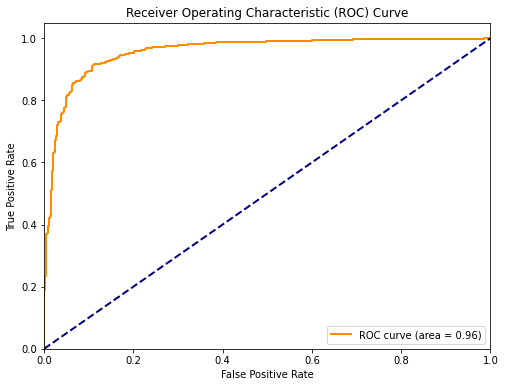

In [37]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

The model has a good ROC curve. That indicates that the model has a high true positive rate (sensitivity) and a low false positive rate (1-specificity). The Area Under the Curve (AUC) is a single scalar value that summarizes the performance of the model; an AUC close to 1.0 signifies a very good model, while an AUC close to 0.5 suggests a model with no discriminative power.

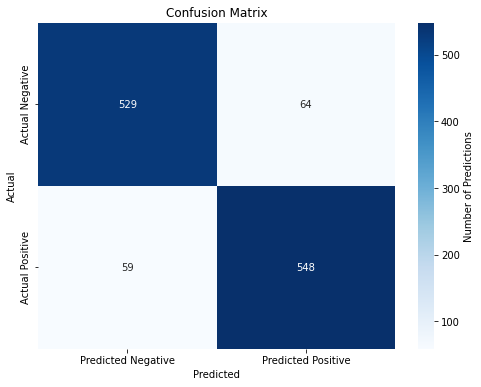

In [38]:
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
                      xticklabels=['Predicted Negative', 'Predicted Positive'],
                      yticklabels=['Actual Negative', 'Actual Positive'])
heatmap.collections[0].colorbar.set_label("Number of Predictions")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The confusion matrix shows the ability of the model to predict accurately both the positive and negative classes.